# Predictive Analytics

- Write an explanation for the purpose of the model
- Write an explanation for what types of models that will be built and why
- Write an explanation for how the models will be scored and how a model will be selected

In [1]:
from load_data import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression


In [2]:
data = load_data()
n_df = load_normalized_data()
s_data = load_selected_data()
scores = {}

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## Linear Regression

#### Using Full Data Set

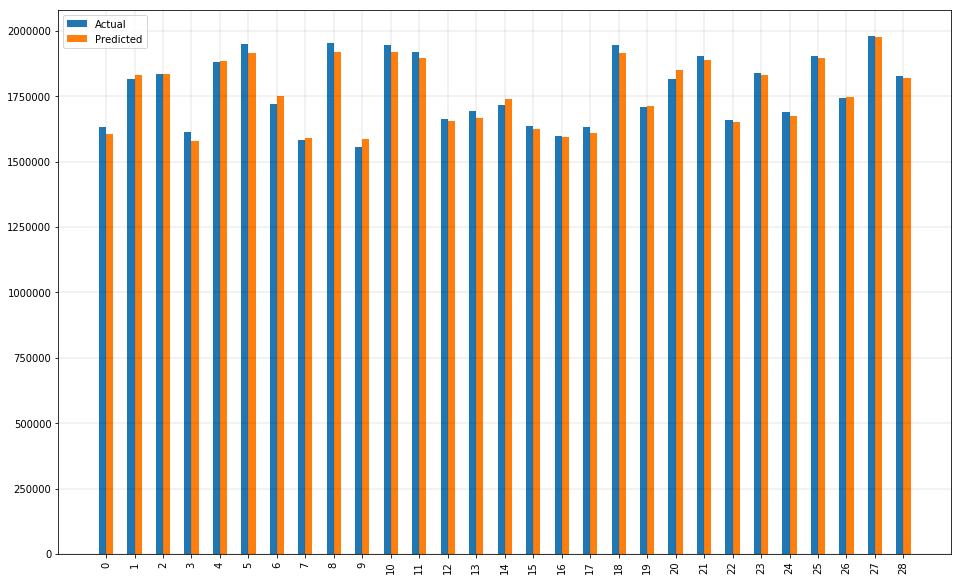

Mean Absolute Error: 17085.01314411098
Mean Squared Error: 428427991.9148253
Root Mean Squared Error: 20698.502165973878


In [29]:
X = data.drop(columns=['GDP'])
y = data['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

linR = LinearRegression()  
linR.fit(X_train, y_train)

y_pred = linR.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
scores['Linear Regression - FULL DATA'] = {'MAE': metrics.mean_absolute_error(y_test, y_pred),'MSE': metrics.mean_squared_error(y_test, y_pred),'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))}


#### Using Selected Data Set

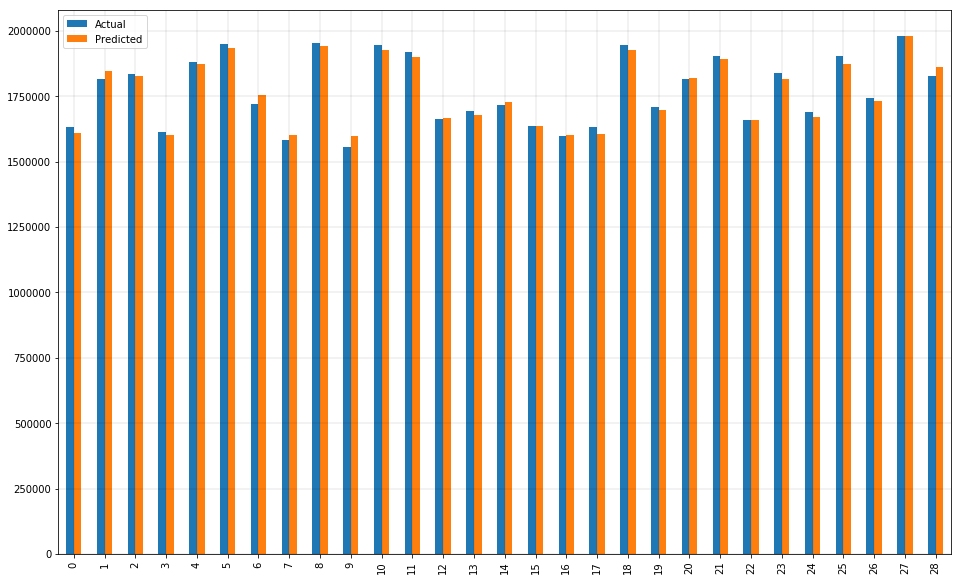

Mean Absolute Error: 16267.751619093136
Mean Squared Error: 374727794.8896972
Root Mean Squared Error: 19357.887149420443


In [16]:
X = s_data.drop(columns=['GDP'])
y = s_data['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

linR = LinearRegression()  
linR.fit(X_train, y_train)

y_pred = linR.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

df1.plot(kind='line',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
scores['Linear Regression - SELECTED DATA'] = {'MAE': metrics.mean_absolute_error(y_test, y_pred),'MSE': metrics.mean_squared_error(y_test, y_pred),'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))}



## K- Nearest Neighbors

#### Using Full Data Set with 5 Neighbors

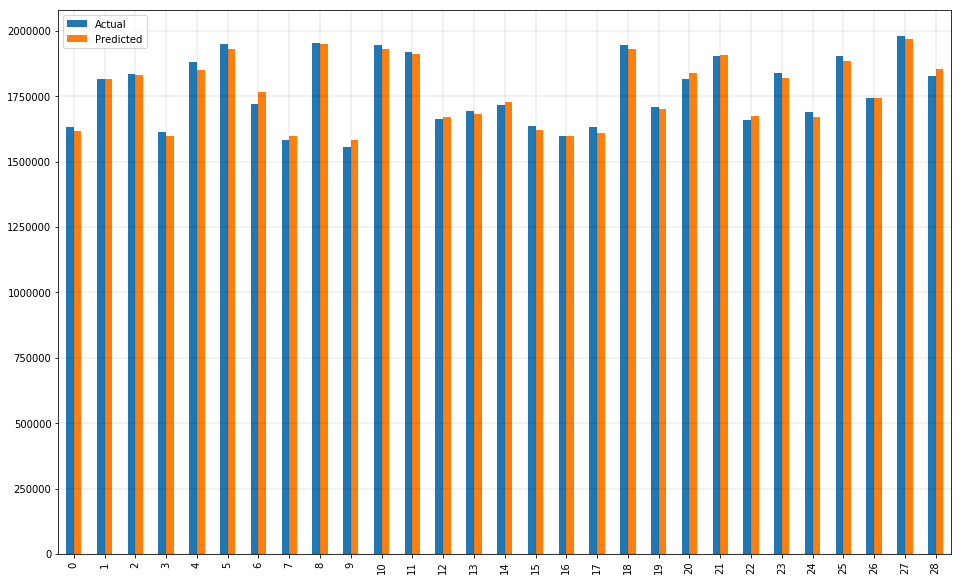

Mean Absolute Error: 15134.344827586207
Mean Squared Error: 328805042.73931074
Root Mean Squared Error: 18132.98217997555


In [17]:
X = data.drop(columns=['GDP'])
y = data['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

df1.plot(kind='line',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
scores['KNN - 5 - FULL DATA'] = {'MAE': metrics.mean_absolute_error(y_test, y_pred),'MSE': metrics.mean_squared_error(y_test, y_pred),'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))}


#### Using Selected Data Set with 5 Neighbors

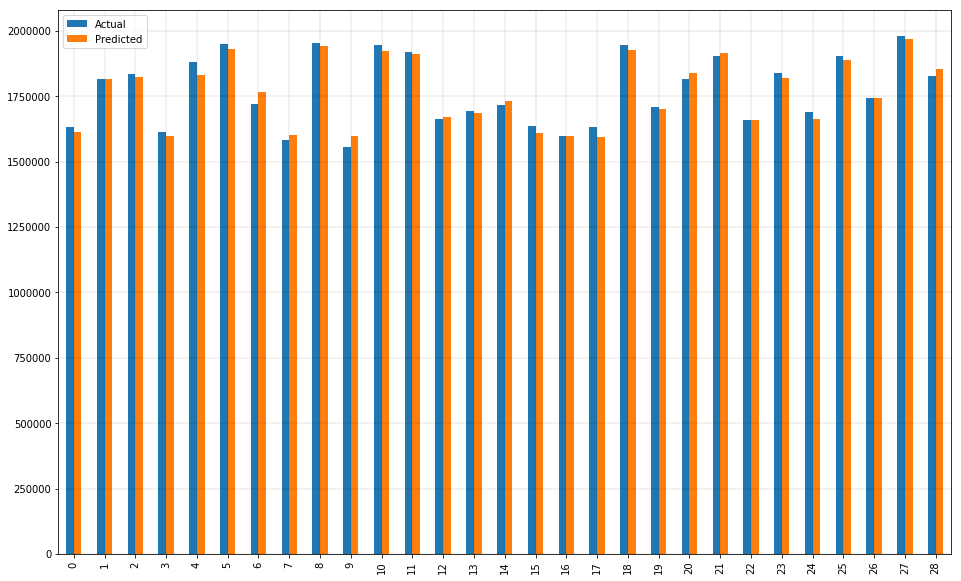

Mean Absolute Error: 17799.18620689655
Mean Squared Error: 480586562.58758646
Root Mean Squared Error: 21922.284611499468


In [18]:
X = s_data.drop(columns=['GDP'])
y = s_data['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

df1.plot(kind='line',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
scores['KNN - 5 - SELECTED DATA'] = {'MAE': metrics.mean_absolute_error(y_test, y_pred),'MSE': metrics.mean_squared_error(y_test, y_pred),'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))}


#### Using Full Data Set with 3 Neighbors

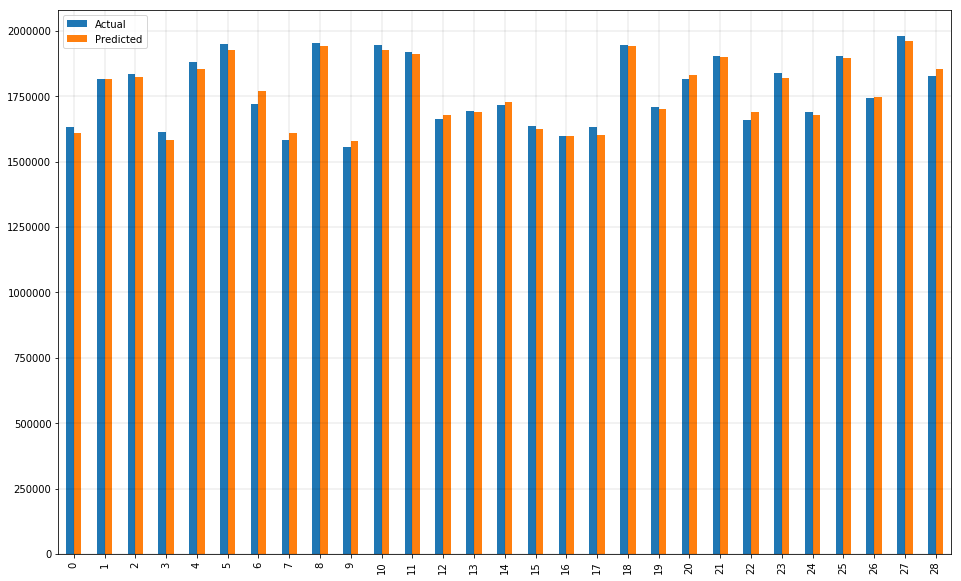

Mean Absolute Error: 16325.149425287362
Mean Squared Error: 399239637.11111146
Root Mean Squared Error: 19980.981885560865


In [19]:
X = data.drop(columns=['GDP'])
y = data['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

df1.plot(kind='line',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
scores['KNN - 3 - FULL DATA'] = {'MAE': metrics.mean_absolute_error(y_test, y_pred),'MSE': metrics.mean_squared_error(y_test, y_pred),'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))}


#### Using Selected Data Set with 3 Neighbors

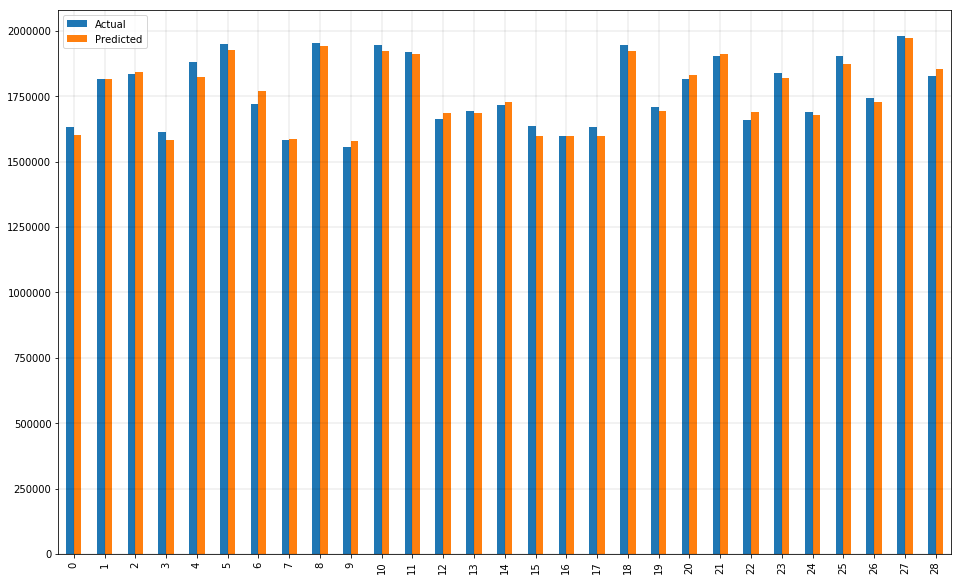

Mean Absolute Error: 19861.620689655174
Mean Squared Error: 585589753.8199238
Root Mean Squared Error: 24198.961833515168


In [20]:
X = s_data.drop(columns=['GDP'])
y = s_data['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

df1.plot(kind='line',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
scores['KNN - 3 - SELECTED DATA'] = {'MAE': metrics.mean_absolute_error(y_test, y_pred),'MSE': metrics.mean_squared_error(y_test, y_pred),'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))}



#### Using Full Data Set with 7 Neighbors

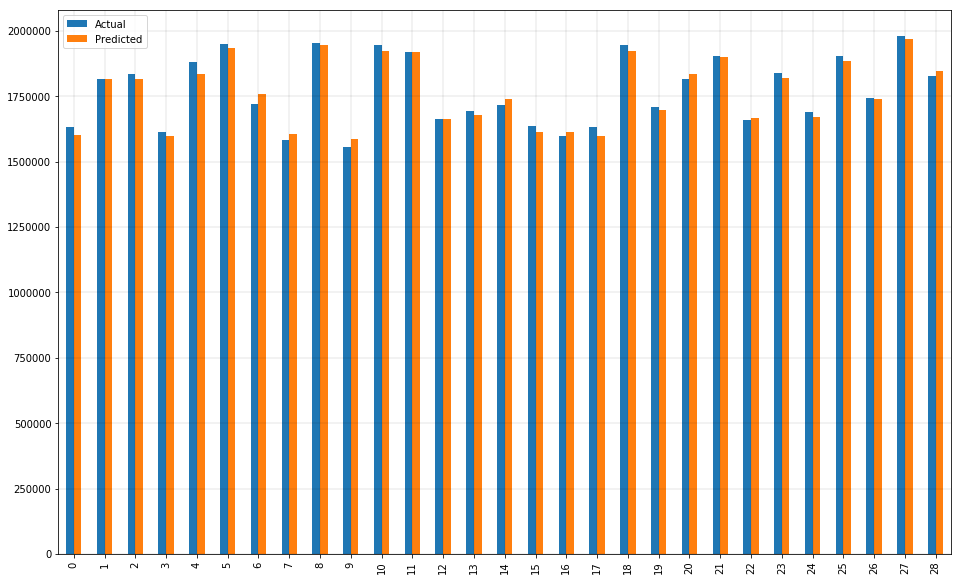

Mean Absolute Error: 17743.75862068965
Mean Squared Error: 440078115.9795913
Root Mean Squared Error: 20978.038897370538


In [21]:
X = data.drop(columns=['GDP'])
y = data['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

df1.plot(kind='line',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
scores['KNN - 7 - FULL DATA'] = {'MAE': metrics.mean_absolute_error(y_test, y_pred),'MSE': metrics.mean_squared_error(y_test, y_pred),'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))}


#### Using Selected Data Set with 7 Neighbors

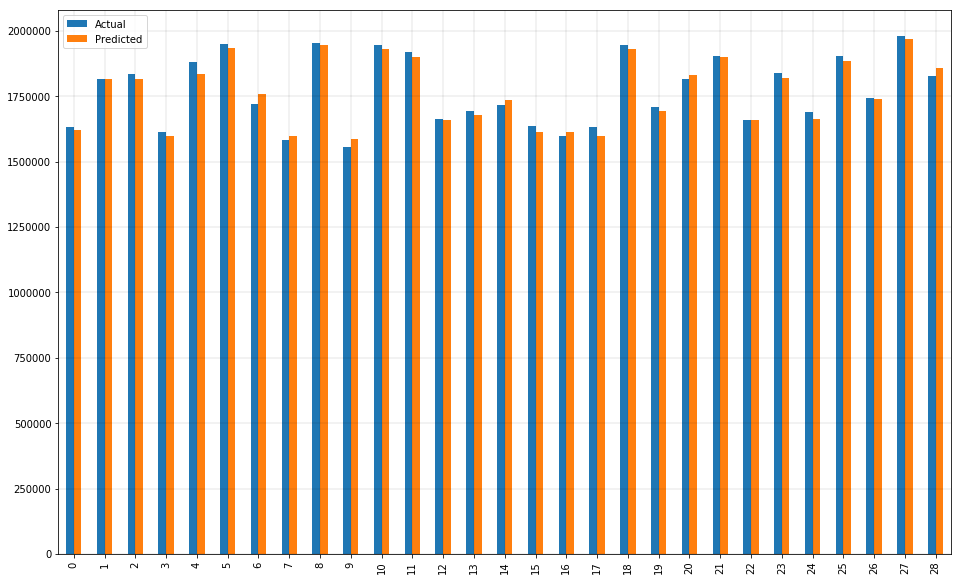

Mean Absolute Error: 17321.428571428565
Mean Squared Error: 419400533.0767063
Root Mean Squared Error: 20479.270814086773


In [22]:
X = s_data.drop(columns=['GDP'])
y = s_data['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

df1.plot(kind='line',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
scores['KNN - 5 - FULL DATA'] = {'MAE': metrics.mean_absolute_error(y_test, y_pred),'MSE': metrics.mean_squared_error(y_test, y_pred),'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))}


## Selecting A Model

In [23]:
scores = pd.DataFrame.from_dict(scores).T
scores

,MAE,MSE,RMSE
Linear Regression - FULL DATA,17085.013144,4.284280e+08,20698.502166
Linear Regression - SELECTED DATA,16267.751619,3.747278e+08,19357.887149
KNN - 5 - FULL DATA,15134.344828,3.288050e+08,18132.982180
KNN - 5 - SELECTED DATA,17799.186207,4.805866e+08,21922.284611
KNN - 3 - FULL DATA,16325.149425,3.992396e+08,19980.981886
KNN - 3 - SELECTED DATA,19861.620690,5.855898e+08,24198.961834
KNN - 7 - FULL DATA,17743.758621,4.400781e+08,20978.038897
KNN - 7 - SELECTED DATA,17321.428571,4.194005e+08,20479.270814


In [ ]:
KNN 5 FULL Data

# Utilizing Model for Predictive Analytics

Increase and Decrease
'electricity -Total generation' by 10%
'cap_markets -Retirements' by 10%
'wages -Compensation of employees' by 10%
Evaluate Results


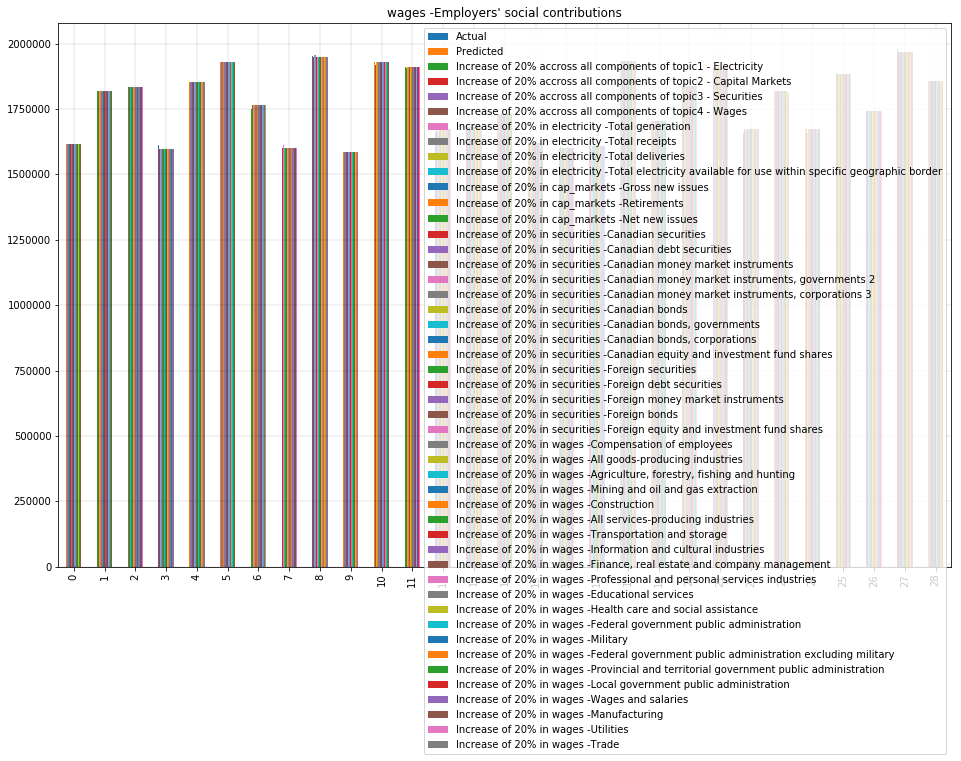

,Actual,Predicted,Increase of 20% accross all components of topic1 - Electricity,Increase of 20% accross all components of topic2 - Capital Markets,Increase of 20% accross all components of topic3 - Securities,Increase of 20% accross all components of topic4 - Wages,Increase of 20% in electricity -Total generation,Increase of 20% in electricity -Total receipts,Increase of 20% in electricity -Total deliveries,Increase of 20% in electricity -Total electricity available for use within specific geographic border,...,Increase of 20% in wages -Health care and social assistance,Increase of 20% in wages -Federal government public administration,Increase of 20% in wages -Military,Increase of 20% in wages -Federal government public administration excluding military,Increase of 20% in wages -Provincial and territorial government public administration,Increase of 20% in wages -Local government public administration,Increase of 20% in wages -Wages and salaries,Increase of 20% in wages -Manufacturing,Increase of 20% in wages -Utilities,Increase of 20% in wages -Trade
0,1631956,1616725.2,1616725.2,1616725.2,1616725.2,1616725.2,1616725.2,1616725.2,1616725.2,1616725.2,...,1616725.2,1616725.2,1616725.2,1616725.2,1616725.2,1616725.2,1616725.2,1616725.2,1616725.2,1616725.2
1,1817855,1816985.6,1816985.6,1816985.6,1816985.6,1816985.6,1816985.6,1816985.6,1816985.6,1816985.6,...,1816985.6,1816985.6,1816985.6,1816985.6,1816985.6,1816985.6,1816985.6,1816985.6,1816985.6,1816985.6
2,1833683,1832379.8,1832379.8,1832379.8,1832379.8,1832379.8,1832379.8,1832379.8,1832379.8,1832379.8,...,1832379.8,1832379.8,1832379.8,1832379.8,1832379.8,1832379.8,1832379.8,1832379.8,1832379.8,1832379.8
3,1613597,1596493.0,1596493.0,1596493.0,1596493.0,1596493.0,1596493.0,1596493.0,1596493.0,1596493.0,...,1596493.0,1596493.0,1596493.0,1596493.0,1596493.0,1596493.0,1596493.0,1596493.0,1596493.0,1596493.0
4,1882877,1851685.2,1849614.2,1851685.2,1851685.2,1851685.2,1851685.2,1851685.2,1851685.2,1851685.2,...,1851685.2,1851685.2,1851685.2,1851685.2,1851685.2,1851685.2,1851685.2,1851685.2,1851685.2,1851685.2
5,1948264,1930222.6,1930222.6,1930222.6,1930222.6,1930222.6,1930222.6,1930222.6,1930222.6,1930222.6,...,1930222.6,1930222.6,1930222.6,1930222.6,1930222.6,1930222.6,1930222.6,1930222.6,1930222.6,1930222.6
6,1719763,1764969.6,1749744.0,1764969.6,1764969.6,1764969.6,1749744.0,1764969.6,1764969.6,1749744.0,...,1764969.6,1764969.6,1764969.6,1764969.6,1764969.6,1764969.6,1764969.6,1764969.6,1764969.6,1764969.6
7,1583102,1599972.8,1599972.8,1599972.8,1599972.8,1599972.8,1612903.6,1599972.8,1599972.8,1601737.4,...,1599972.8,1599972.8,1599972.8,1599972.8,1599972.8,1599972.8,1599972.8,1599972.8,1599972.8,1599972.8
8,1951927,1950352.0,1957498.8,1950352.0,1950352.0,1950352.0,1957498.8,1950352.0,1950352.0,1957498.8,...,1950352.0,1950352.0,1950352.0,1950352.0,1950352.0,1950352.0,1950352.0,1950352.0,1950352.0,1950352.0
9,1556689,1584425.6,1584425.6,1584425.6,1584425.6,1584425.6,1584425.6,1584425.6,1584425.6,1584425.6,...,1584425.6,1584425.6,1584425.6,1584425.6,1584425.6,1584425.6,1584425.6,1584425.6,1584425.6,1584425.6


In [7]:
test_col1 = 'electricity -Total generation'
test_col2 = 'electricity -Total receipts'
test_col3 = 'electricity -Total deliveries'
test_col4 = 'electricity -Total electricity available for use within specific geographic border'
test_col5 = 'cap_markets -Gross new issues'
test_col6 = 'cap_markets -Retirements'
test_col7 = 'cap_markets -Net new issues'
test_col8 = 'securities -Canadian securities'
test_col9 = 'securities -Canadian debt securities'
test_col10 = 'securities -Canadian money market instruments'
test_col11 = 'securities -Canadian money market instruments, governments 2'
test_col12 = 'securities -Canadian money market instruments, corporations 3'
test_col13 = 'securities -Canadian bonds'
test_col14 = 'securities -Canadian bonds, governments'
test_col15 = 'securities -Canadian bonds, corporations'
test_col16 = 'securities -Canadian equity and investment fund shares'
test_col17 = 'securities -Foreign securities'
test_col18 = 'securities -Foreign debt securities'
test_col19 = 'securities -Foreign money market instruments'
test_col20 = 'securities -Foreign bonds'
test_col21 = 'securities -Foreign equity and investment fund shares'
test_col22 = 'wages -Compensation of employees'
test_col23 = 'wages -All goods-producing industries'
test_col24 = 'wages -Agriculture, forestry, fishing and hunting'
test_col25 = 'wages -Mining and oil and gas extraction'
test_col26 = 'wages -Construction'
test_col27 = 'wages -All services-producing industries'
test_col28 = 'wages -Transportation and storage'
test_col29 = 'wages -Information and cultural industries'
test_col30 = 'wages -Finance, real estate and company management'
test_col31 = 'wages -Professional and personal services industries'
test_col32 = 'wages -Educational services'
test_col33 = 'wages -Health care and social assistance'
test_col34 = 'wages -Federal government public administration'
test_col35 = 'wages -Military'
test_col36 = 'wages -Federal government public administration excluding military'
test_col37 = 'wages -Provincial and territorial government public administration'
test_col38 = 'wages -Local government public administration'
test_col40 = 'wages -Wages and salaries'
test_col41 = 'wages -Manufacturing'
test_col42 = 'wages -Utilities'
test_col43 = 'wages -Trade'
 



 

# Gettting Model's Predicted Value

X = data.drop(columns=['GDP'])
y = data['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


# Getting + 20% Value, Col 1
p20_data_test_col1 = data.copy()
p20_data_test_col1[test_col1] = data[test_col1].apply(lambda x : x*1.2)
X = p20_data_test_col1.drop(columns=['GDP'])
y = p20_data_test_col1['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col1 = knn.predict(X_test)

# Getting + 20% Value, Col 2
p20_data_test_col2 = data.copy()
p20_data_test_col2[test_col2] = data[test_col2].apply(lambda x : x*1.2)
X = p20_data_test_col2.drop(columns=['GDP'])
y = p20_data_test_col2['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col2 = knn.predict(X_test)

# Getting + 20% Value, Col 3
p20_data_test_col3 = data.copy()
p20_data_test_col3[test_col3] = data[test_col3].apply(lambda x : x*1.2)
X = p20_data_test_col3.drop(columns=['GDP'])
y = p20_data_test_col3['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col3 = knn.predict(X_test)

# Getting + 20% Value, Col 4
p20_data_test_col4 = data.copy()
p20_data_test_col4[test_col4] = data[test_col4].apply(lambda x : x*1.2)
X = p20_data_test_col4.drop(columns=['GDP'])
y = p20_data_test_col4['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col4 = knn.predict(X_test)

# Getting + 20% Value, Col 5
p20_data_test_col5 = data.copy()
p20_data_test_col5[test_col5] = data[test_col5].apply(lambda x : x*1.2)
X = p20_data_test_col5.drop(columns=['GDP'])
y = p20_data_test_col5['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col5 = knn.predict(X_test)

# Getting + 20% Value, Col 6
p20_data_test_col6 = data.copy()
p20_data_test_col6[test_col6] = data[test_col6].apply(lambda x : x*1.2)
X = p20_data_test_col6.drop(columns=['GDP'])
y = p20_data_test_col6['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col6 = knn.predict(X_test)

# Getting + 20% Value, Col 7
p20_data_test_col7 = data.copy()
p20_data_test_col7[test_col7] = data[test_col7].apply(lambda x : x*1.2)
X = p20_data_test_col7.drop(columns=['GDP'])
y = p20_data_test_col7['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col7 = knn.predict(X_test)

# Getting + 20% Value, Col 8
p20_data_test_col8 = data.copy()
p20_data_test_col8[test_col8] = data[test_col8].apply(lambda x : x*1.2)
X = p20_data_test_col8.drop(columns=['GDP'])
y = p20_data_test_col8['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col8 = knn.predict(X_test)

# Getting + 20% Value, Col 9
p20_data_test_col9 = data.copy()
p20_data_test_col9[test_col9] = data[test_col9].apply(lambda x : x*1.2)
X = p20_data_test_col9.drop(columns=['GDP'])
y = p20_data_test_col9['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col9 = knn.predict(X_test)

# Getting + 20% Value, Col 10
p20_data_test_col10 = data.copy()
p20_data_test_col10[test_col10] = data[test_col10].apply(lambda x : x*1.2)
X = p20_data_test_col10.drop(columns=['GDP'])
y = p20_data_test_col10['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col10 = knn.predict(X_test)


# Getting + 20% Value, Col 11
p20_data_test_col11 = data.copy()
p20_data_test_col11[test_col11] = data[test_col11].apply(lambda x : x*1.2)
X = p20_data_test_col11.drop(columns=['GDP'])
y = p20_data_test_col11['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col11 = knn.predict(X_test)

# Getting + 20% Value, Col 12
p20_data_test_col12 = data.copy()
p20_data_test_col12[test_col12] = data[test_col12].apply(lambda x : x*1.2)
X = p20_data_test_col12.drop(columns=['GDP'])
y = p20_data_test_col12['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col12 = knn.predict(X_test)

# Getting + 20% Value, Col 13
p20_data_test_col13 = data.copy()
p20_data_test_col13[test_col13] = data[test_col13].apply(lambda x : x*1.2)
X = p20_data_test_col13.drop(columns=['GDP'])
y = p20_data_test_col13['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col13 = knn.predict(X_test)

# Getting + 20% Value, Col 14
p20_data_test_col14 = data.copy()
p20_data_test_col14[test_col14] = data[test_col14].apply(lambda x : x*1.2)
X = p20_data_test_col14.drop(columns=['GDP'])
y = p20_data_test_col14['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col14 = knn.predict(X_test)

# Getting + 20% Value, Col 15
p20_data_test_col15 = data.copy()
p20_data_test_col15[test_col15] = data[test_col15].apply(lambda x : x*1.2)
X = p20_data_test_col15.drop(columns=['GDP'])
y = p20_data_test_col15['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col15 = knn.predict(X_test)

# Getting + 20% Value, Col 16
p20_data_test_col16 = data.copy()
p20_data_test_col16[test_col16] = data[test_col16].apply(lambda x : x*1.2)
X = p20_data_test_col16.drop(columns=['GDP'])
y = p20_data_test_col16['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col16 = knn.predict(X_test)

# Getting + 20% Value, Col 17
p20_data_test_col17 = data.copy()
p20_data_test_col17[test_col17] = data[test_col17].apply(lambda x : x*1.2)
X = p20_data_test_col17.drop(columns=['GDP'])
y = p20_data_test_col17['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col17 = knn.predict(X_test)

# Getting + 20% Value, Col 18
p20_data_test_col18 = data.copy()
p20_data_test_col18[test_col18] = data[test_col18].apply(lambda x : x*1.2)
X = p20_data_test_col18.drop(columns=['GDP'])
y = p20_data_test_col18['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col18 = knn.predict(X_test)

# Getting + 20% Value, Col 19
p20_data_test_col19 = data.copy()
p20_data_test_col19[test_col19] = data[test_col19].apply(lambda x : x*1.2)
X = p20_data_test_col19.drop(columns=['GDP'])
y = p20_data_test_col19['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col19 = knn.predict(X_test)

# Getting + 20% Value, Col 20
p20_data_test_col20 = data.copy()
p20_data_test_col20[test_col20] = data[test_col20].apply(lambda x : x*1.2)
X = p20_data_test_col20.drop(columns=['GDP'])
y = p20_data_test_col20['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col20 = knn.predict(X_test)

# Getting + 20% Value, Col 21
p20_data_test_col21 = data.copy()
p20_data_test_col21[test_col21] = data[test_col21].apply(lambda x : x*1.2)
X = p20_data_test_col21.drop(columns=['GDP'])
y = p20_data_test_col21['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col21 = knn.predict(X_test)

# Getting + 20% Value, Col 22
p20_data_test_col22 = data.copy()
p20_data_test_col22[test_col22] = data[test_col22].apply(lambda x : x*1.2)
X = p20_data_test_col22.drop(columns=['GDP'])
y = p20_data_test_col22['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col22 = knn.predict(X_test)

# Getting + 20% Value, Col 23
p20_data_test_col23 = data.copy()
p20_data_test_col23[test_col23] = data[test_col23].apply(lambda x : x*1.2)
X = p20_data_test_col23.drop(columns=['GDP'])
y = p20_data_test_col23['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col23 = knn.predict(X_test)

# Getting + 20% Value, Col 24
p20_data_test_col24 = data.copy()
p20_data_test_col24[test_col24] = data[test_col24].apply(lambda x : x*1.2)
X = p20_data_test_col24.drop(columns=['GDP'])
y = p20_data_test_col24['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col24 = knn.predict(X_test)

# Getting + 20% Value, Col 5
p20_data_test_col25 = data.copy()
p20_data_test_col25[test_col25] = data[test_col25].apply(lambda x : x*1.2)
X = p20_data_test_col25.drop(columns=['GDP'])
y = p20_data_test_col25['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col25 = knn.predict(X_test)

# Getting + 20% Value, Col 26
p20_data_test_col26 = data.copy()
p20_data_test_col26[test_col26] = data[test_col26].apply(lambda x : x*1.2)
X = p20_data_test_col26.drop(columns=['GDP'])
y = p20_data_test_col26['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col26 = knn.predict(X_test)

# Getting + 20% Value, Col 7
p20_data_test_col27 = data.copy()
p20_data_test_col27[test_col27] = data[test_col27].apply(lambda x : x*1.2)
X = p20_data_test_col27.drop(columns=['GDP'])
y = p20_data_test_col27['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col27 = knn.predict(X_test)

# Getting + 20% Value, Col 28
p20_data_test_col28 = data.copy()
p20_data_test_col28[test_col28] = data[test_col28].apply(lambda x : x*1.2)
X = p20_data_test_col28.drop(columns=['GDP'])
y = p20_data_test_col28['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col28 = knn.predict(X_test)

# Getting + 20% Value, Col 29
p20_data_test_col29 = data.copy()
p20_data_test_col29[test_col29] = data[test_col29].apply(lambda x : x*1.2)
X = p20_data_test_col29.drop(columns=['GDP'])
y = p20_data_test_col29['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col29 = knn.predict(X_test)

# Getting + 20% Value, Col 30
p20_data_test_col30 = data.copy()
p20_data_test_col30[test_col30] = data[test_col30].apply(lambda x : x*1.2)
X = p20_data_test_col30.drop(columns=['GDP'])
y = p20_data_test_col30['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col30 = knn.predict(X_test)

# Getting + 20% Value, Col 31
p20_data_test_col31 = data.copy()
p20_data_test_col31[test_col31] = data[test_col31].apply(lambda x : x*1.2)
X = p20_data_test_col31.drop(columns=['GDP'])
y = p20_data_test_col31['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col31 = knn.predict(X_test)

# Getting + 20% Value, Col 32
p20_data_test_col32 = data.copy()
p20_data_test_col32[test_col32] = data[test_col32].apply(lambda x : x*1.2)
X = p20_data_test_col32.drop(columns=['GDP'])
y = p20_data_test_col32['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col32 = knn.predict(X_test)

# Getting + 20% Value, Col 33
p20_data_test_col33 = data.copy()
p20_data_test_col33[test_col33] = data[test_col33].apply(lambda x : x*1.2)
X = p20_data_test_col33.drop(columns=['GDP'])
y = p20_data_test_col33['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col33 = knn.predict(X_test)

# Getting + 20% Value, Col 34
p20_data_test_col34 = data.copy()
p20_data_test_col34[test_col34] = data[test_col34].apply(lambda x : x*1.2)
X = p20_data_test_col34.drop(columns=['GDP'])
y = p20_data_test_col34['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col34 = knn.predict(X_test)

# Getting + 20% Value, Col 35
p20_data_test_col35 = data.copy()
p20_data_test_col35[test_col35] = data[test_col35].apply(lambda x : x*1.2)
X = p20_data_test_col35.drop(columns=['GDP'])
y = p20_data_test_col35['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col35 = knn.predict(X_test)

# Getting + 20% Value, Col 36
p20_data_test_col36 = data.copy()
p20_data_test_col36[test_col36] = data[test_col36].apply(lambda x : x*1.2)
X = p20_data_test_col36.drop(columns=['GDP'])
y = p20_data_test_col36['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col36 = knn.predict(X_test)

# Getting + 20% Value, Col 37
p20_data_test_col37 = data.copy()
p20_data_test_col37[test_col37] = data[test_col37].apply(lambda x : x*1.2)
X = p20_data_test_col37.drop(columns=['GDP'])
y = p20_data_test_col37['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col37 = knn.predict(X_test)

# Getting + 20% Value, Col 38
p20_data_test_col38 = data.copy()
p20_data_test_col38[test_col38] = data[test_col38].apply(lambda x : x*1.2)
X = p20_data_test_col38.drop(columns=['GDP'])
y = p20_data_test_col38['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col38 = knn.predict(X_test)



# Getting + 20% Value, Col 40
p20_data_test_col40 = data.copy()
p20_data_test_col40[test_col40] = data[test_col40].apply(lambda x : x*1.2)
X = p20_data_test_col40.drop(columns=['GDP'])
y = p20_data_test_col40['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col40 = knn.predict(X_test)


# Getting + 20% Value, Col 41
p20_data_test_col41 = data.copy()
p20_data_test_col41[test_col41] = data[test_col41].apply(lambda x : x*1.2)
X = p20_data_test_col41.drop(columns=['GDP'])
y = p20_data_test_col41['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col41 = knn.predict(X_test)

# Getting + 20% Value, Col 42
p20_data_test_col42 = data.copy()
p20_data_test_col42[test_col42] = data[test_col42].apply(lambda x : x*1.2)
X = p20_data_test_col42.drop(columns=['GDP'])
y = p20_data_test_col42['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col42 = knn.predict(X_test)

# Getting + 20% Value, Col 43
p20_data_test_col43 = data.copy()
p20_data_test_col43[test_col43] = data[test_col43].apply(lambda x : x*1.2)
X = p20_data_test_col43.drop(columns=['GDP'])
y = p20_data_test_col43['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_col43 = knn.predict(X_test)


# Getting + 20% Value, topic 1 electricity 
#includes col1, col2, col3, col4
p20_data_test_topic1 = data.copy()
p20_data_test_topic1[test_col1] = data[test_col1].apply(lambda x : x*1.2)
p20_data_test_topic1[test_col2] = data[test_col2].apply(lambda x : x*1.2)
p20_data_test_topic1[test_col3] = data[test_col3].apply(lambda x : x*1.2)
p20_data_test_topic1[test_col4] = data[test_col4].apply(lambda x : x*1.2)
X = p20_data_test_topic1.drop(columns=['GDP'])
y = p20_data_test_topic1['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_topic1 = knn.predict(X_test)


# Getting + 20% Value, topic 2  capital market 
#includes col5, col6, col7
p20_data_test_topic2 = data.copy()
p20_data_test_topic2[test_col5] = data[test_col5].apply(lambda x : x*1.2)
p20_data_test_topic2[test_col6] = data[test_col6].apply(lambda x : x*1.2)
p20_data_test_topic2[test_col7] = data[test_col7].apply(lambda x : x*1.2)
X = p20_data_test_topic2.drop(columns=['GDP'])
y = p20_data_test_topic2['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_topic2 = knn.predict(X_test)


# Getting + 20% Value, topic 3 securities
#includes col8-col21
p20_data_test_topic3 = data.copy()
p20_data_test_topic3[test_col8] = data[test_col8].apply(lambda x : x*1.2)
p20_data_test_topic3[test_col9] = data[test_col9].apply(lambda x : x*1.2)
p20_data_test_topic3[test_col10] = data[test_col10].apply(lambda x : x*1.2)
p20_data_test_topic3[test_col11] = data[test_col11].apply(lambda x : x*1.2)
p20_data_test_topic3[test_col12] = data[test_col12].apply(lambda x : x*1.2)
p20_data_test_topic3[test_col13] = data[test_col13].apply(lambda x : x*1.2)
p20_data_test_topic3[test_col14] = data[test_col14].apply(lambda x : x*1.2)
p20_data_test_topic3[test_col15] = data[test_col15].apply(lambda x : x*1.2)
p20_data_test_topic3[test_col16] = data[test_col16].apply(lambda x : x*1.2)
p20_data_test_topic3[test_col17] = data[test_col17].apply(lambda x : x*1.2)
p20_data_test_topic3[test_col18] = data[test_col18].apply(lambda x : x*1.2)
p20_data_test_topic3[test_col19] = data[test_col19].apply(lambda x : x*1.2)
p20_data_test_topic3[test_col20] = data[test_col20].apply(lambda x : x*1.2)
p20_data_test_topic3[test_col21] = data[test_col21].apply(lambda x : x*1.2)
X = p20_data_test_topic3.drop(columns=['GDP'])
y = p20_data_test_topic3['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_topic3 = knn.predict(X_test)


# Getting + 20% Value, topic 4 Wages
#includes col22-col43
p20_data_test_topic4 = data.copy()
p20_data_test_topic4[test_col22] = data[test_col22].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col23] = data[test_col23].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col24] = data[test_col24].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col25] = data[test_col25].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col26] = data[test_col26].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col27] = data[test_col27].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col28] = data[test_col28].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col30] = data[test_col30].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col31] = data[test_col31].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col32] = data[test_col32].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col33] = data[test_col33].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col34] = data[test_col34].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col35] = data[test_col35].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col36] = data[test_col36].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col37] = data[test_col37].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col38] = data[test_col38].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col29] = data[test_col29].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col40] = data[test_col40].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col41] = data[test_col41].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col42] = data[test_col42].apply(lambda x : x*1.2)
p20_data_test_topic4[test_col43] = data[test_col43].apply(lambda x : x*1.2)

X = p20_data_test_topic4.drop(columns=['GDP'])
y = p20_data_test_topic4['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p20_pred_topic4 = knn.predict(X_test)

# Getting - 10% Value
m10_data = data.copy()
m10_data[test_col] = data[test_col].apply(lambda x : x*0.9)
X = m10_data.drop(columns=['GDP'])
y = m10_data['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# SWAP THIS WITH WHATEVER MODEL IS FINALLY SELECTED
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
m10_pred = knn.predict(X_test)


df1 = pd.DataFrame({'Actual': y_test1.flatten(), 'Predicted': y_pred.flatten(), 'Increase of 20% accross all components of topic1 - Electricity': p20_pred_topic1.flatten(), 'Increase of 20% accross all components of topic2 - Capital Markets': p20_pred_topic2.flatten(), 'Increase of 20% accross all components of topic3 - Securities': p20_pred_topic3.flatten(), 'Increase of 20% accross all components of topic4 - Wages': p20_pred_topic4.flatten(), 'Increase of 20% in electricity -Total generation': p20_pred_col1.flatten(), 'Increase of 20% in electricity -Total receipts': p20_pred_col2.flatten(), 'Increase of 20% in electricity -Total deliveries ': p20_pred_col3.flatten(), 'Increase of 20% in electricity -Total electricity available for use within specific geographic border': p20_pred_col4.flatten(), 'Increase of 20% in cap_markets -Gross new issues': p20_pred_col5.flatten(), 'Increase of 20% in cap_markets -Retirements': p20_pred_col6.flatten(), 'Increase of 20% in cap_markets -Net new issues': p20_pred_col7.flatten(), 'Increase of 20% in securities -Canadian securities': p20_pred_col8.flatten(), 'Increase of 20% in securities -Canadian debt securities': p20_pred_col9.flatten(), 'Increase of 20% in securities -Canadian money market instruments': p20_pred_col10.flatten(), 'Increase of 20% in securities -Canadian money market instruments, governments 2': p20_pred_col11.flatten(), 'Increase of 20% in securities -Canadian money market instruments, corporations 3': p20_pred_col12.flatten(), 'Increase of 20% in securities -Canadian bonds': p20_pred_col13.flatten(), 'Increase of 20% in securities -Canadian bonds, governments': p20_pred_col14.flatten(), 'Increase of 20% in securities -Canadian bonds, corporations': p20_pred_col15.flatten(), 'Increase of 20% in securities -Canadian equity and investment fund shares': p20_pred_col16.flatten(), 'Increase of 20% in securities -Foreign securities': p20_pred_col17.flatten(), 'Increase of 20% in securities -Foreign debt securities': p20_pred_col18.flatten(), 'Increase of 20% in securities -Foreign money market instruments': p20_pred_col19.flatten(), 'Increase of 20% in securities -Foreign bonds': p20_pred_col20.flatten(), 'Increase of 20% in securities -Foreign equity and investment fund shares': p20_pred_col21.flatten(), 'Increase of 20% in wages -Compensation of employees': p20_pred_col22.flatten(), 'Increase of 20% in wages -All goods-producing industries': p20_pred_col23.flatten(), 'Increase of 20% in wages -Agriculture, forestry, fishing and hunting': p20_pred_col24.flatten(), 'Increase of 20% in wages -Mining and oil and gas extraction': p20_pred_col25.flatten(), 'Increase of 20% in wages -Construction': p20_pred_col26.flatten(), 'Increase of 20% in wages -All services-producing industries': p20_pred_col27.flatten(), 'Increase of 20% in wages -Transportation and storage': p20_pred_col28.flatten(), 'Increase of 20% in wages -Information and cultural industries': p20_pred_col29.flatten(), 'Increase of 20% in wages -Finance, real estate and company management': p20_pred_col30.flatten(), 'Increase of 20% in wages -Professional and personal services industries': p20_pred_col31.flatten(), 'Increase of 20% in wages -Educational services': p20_pred_col32.flatten(), 'Increase of 20% in wages -Health care and social assistance': p20_pred_col33.flatten(), 'Increase of 20% in wages -Federal government public administration': p20_pred_col34.flatten(), 'Increase of 20% in wages -Military': p20_pred_col35.flatten(), 'Increase of 20% in wages -Federal government public administration excluding military': p20_pred_col36.flatten(), 'Increase of 20% in wages -Provincial and territorial government public administration': p20_pred_col37.flatten(), 'Increase of 20% in wages -Local government public administration': p20_pred_col38.flatten(), 'Increase of 20% in wages -Wages and salaries ': p20_pred_col40.flatten(), 'Increase of 20% in wages -Manufacturing': p20_pred_col41.flatten(), 'Increase of 20% in wages -Utilities': p20_pred_col42.flatten(), 'Increase of 20% in wages -Trade': p20_pred_col43.flatten()})
df1_mean = df1.mean(axis = 0)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title(test_col)
plt.show()




df1




In [40]:
print(data.columns[1:])

Index(['electricity -Total generation', 'electricity -Total receipts',
       'electricity -Total deliveries',
       'electricity -Total electricity available for use within specific geographic border',
       'cap_markets -Gross new issues', 'cap_markets -Retirements',
       'cap_markets -Net new issues', 'securities -Canadian securities',
       'securities -Canadian debt securities',
       'securities -Canadian money market instruments',
       'securities -Canadian money market instruments, governments 2',
       'securities -Canadian money market instruments, corporations 3',
       'securities -Canadian bonds', 'securities -Canadian bonds, governments',
       'securities -Canadian bonds, corporations',
       'securities -Canadian equity and investment fund shares',
       'securities -Foreign securities', 'securities -Foreign debt securities',
       'securities -Foreign money market instruments',
       'securities -Foreign bonds',
       'securities -Foreign equity and inv

# The REAL Prescriptive Analytics

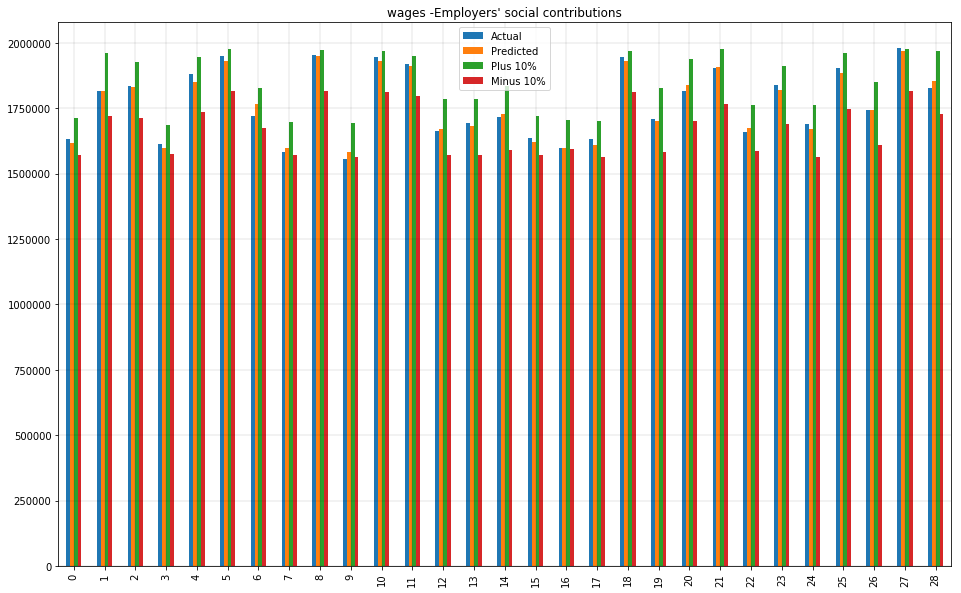

In [48]:
X = data.drop(columns=['GDP'])
y = data['GDP']

X = X.values
y = y.values

X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)

# Getting Original Predicted Values
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
    
# Getting +10% and -10% values for selected columns

# X = p10_data.drop(columns=['GDP'])
# y = p10_data['GDP']

# X = X.values
# y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

df_t = pd.DataFrame(X_test)
df_t.columns = data.columns[1:]

test_list = [
    'electricity -Total generation', 'electricity -Total receipts',
       'electricity -Total deliveries',
       'electricity -Total electricity available for use within specific geographic border',
       'cap_markets -Gross new issues', 'cap_markets -Retirements',
       'cap_markets -Net new issues', 'securities -Canadian securities',
       'securities -Canadian debt securities',
       'securities -Canadian money market instruments',
       'securities -Canadian money market instruments, governments 2',
       'securities -Canadian money market instruments, corporations 3',
       'securities -Canadian bonds', 'securities -Canadian bonds, governments',
       'securities -Canadian bonds, corporations',
       'securities -Canadian equity and investment fund shares',
       'securities -Foreign securities', 'securities -Foreign debt securities',
       'securities -Foreign money market instruments',
       'securities -Foreign bonds',
       'securities -Foreign equity and investment fund shares',
       'wages -Compensation of employees', 'wages -Wages and salaries',
       'wages -All goods-producing industries',
       'wages -Agriculture, forestry, fishing and hunting',
       'wages -Mining and oil and gas extraction', 'wages -Manufacturing',
       'wages -Construction', 'wages -Utilities',
       'wages -All services-producing industries', 'wages -Trade',
       'wages -Transportation and storage',
       'wages -Information and cultural industries',
       'wages -Finance, real estate and company management',
       'wages -Professional and personal services industries',
       'wages -Educational services',
       'wages -Health care and social assistance',
       'wages -Federal government public administration', 'wages -Military',
       'wages -Federal government public administration excluding military',
       'wages -Provincial and territorial government public administration',
       'wages -Local government public administration',
       "wages -Employers' social contributions"
]

p10_data = df_t.copy()
p10_data.columns = data.columns[1:]
m10_data = df_t.copy()
m10_data.columns = data.columns[1:]

for test_col in test_list:   
    p10_data[test_col] = df_t[test_col].apply(lambda x : x*1.1)
    m10_data[test_col] = df_t[test_col].apply(lambda x : x*0.9)

pX_test = p10_data.values
mX_test = m10_data.values

# Testing Model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
p10_pred = knn.predict(pX_test)
m10_pred = knn.predict(mX_test)

df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten(), 'Plus 10%': p10_pred.flatten(), 'Minus 10%': m10_pred.flatten()})

df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title(test_col)
plt.show()
